# Logistic Regression 

Here we took out all the scores, which we found contributed heavily to the label of Autism, or No Autism.


In [25]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [5]:
cd ..

C:\Users\lizba\Desktop\DataViz\autism_machine_learning\asd_machine_learning


In [26]:
# loading dataset
file = 'Resources/Autism.csv'
df = pd.read_csv(file)
df.head(5)

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [27]:
#reshape the data
X =df.drop(columns=["Class","User","Used_App_Before","Case No","Score","Residence","Ethnicity","Screening Type","Language","Age","A6","Jaundice ","A1","A2","A3","A4","A5","A7","A9","A8","A10"])
y =df[['Class']].values.reshape(-1,1)
print(X.shape, y.shape)
X.head()

(1118, 2) (1118, 1)


,Sex,Family_ASD
0,f,no
1,f,no
2,m,no
3,m,no
4,m,no


In [28]:
#train_test_split
from sklearn.model_selection import train_test_split

In [29]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pd.set_option('display.max_columns', None)
X_train.head()

,Sex_f,Sex_m,Family_ASD_no,Family_ASD_yes
361,0,1,1,0
1051,0,1,1,0
533,0,1,1,0
898,1,0,1,0
583,0,1,1,0


In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Notice the large loss in model performance, looking at only sex and family history of Autism.

In [32]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6885441527446301
Testing Data Score: 0.6428571428571429


In [33]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES']
First 10 Actual labels: [['YES'], ['NO'], ['NO'], ['YES'], ['YES'], ['NO'], ['NO'], ['YES'], ['NO'], ['YES']]


# Feature Importance

Feature: Sex_f, Score: -0.03511
Feature: Sex_m, Score: -0.22901
Feature: Family_ASD_no, Score: -0.57965
Feature: Family_ASD_yes, Score: 0.31553


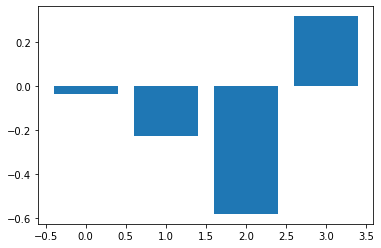

In [34]:
# find feature importance using classifier coeffiant

#print(classifier.coef_[0])
importance = classifier.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Confusion Matrix

In [35]:
# confusion matrix
#predictions, y_test
from sklearn.metrics import confusion_matrix as cm
predictions, y_test
cm = cm(y_test, predictions)
cm

array([[167,  11],
       [ 89,  13]], dtype=int64)

(2, 0)

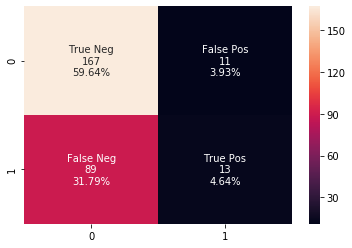

In [40]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", )
ax.set_ylim(2,0)